In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
dataset_zip_path = "/content/drive/MyDrive/archive (14).zip"
extract_to = "/content/dataset"

In [ ]:
if not os.path.exists(extract_to):
    print("Extracting zip...")
    with ZipFile(dataset_zip_path, 'r') as z:
        z.extractall(extract_to)
    print("Done extracting to", extract_to)
else:
    print("Dataset folder already exists:", extract_to)

Extracting zip...
Done extracting to /content/dataset


In [ ]:
train_path = os.path.join(extract_to, "train-cat-rabbit")
val_path = os.path.join(extract_to, "val-cat-rabbit")
test_path = os.path.join(extract_to, "test_images")

print("/npath:")
print("TRAIN:", train_path)
print("TEST:", val_path)
print('Test:',test_path)

/npath:
TRAIN: /content/dataset/train-cat-rabbit
TEST: /content/dataset/val-cat-rabbit
Test: /content/dataset/test_images


In [ ]:
def safe_count(dir_path ,subfolder):
  p = os.path.join(dir_path,subfolder)
  if os.path.exists(p):
    return len([f for f in os.listdir(p) if os.path.isfile(os.path.join(p,f))])
  else:
    return None



train_cat = safe_count(train_path, 'cat')
train_rabbit = safe_count(train_path, 'rabbit')
val_cat   = safe_count(val_path, 'cat')
val_rabbit   = safe_count(val_path, 'rabbit')

print("\n--- Image counts (check here) ---")
print("Train - Cats:", train_cat)
print("Train - rabit:", train_rabbit)
print("Val   - Cats:", val_cat)
print("Val   - rabit:", val_rabbit)
print("----------------------------------\n")


--- Image counts (check here) ---
Train - Cats: 800
Train - rabit: 800
Val   - Cats: 207
Val   - rabit: 207
----------------------------------



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)
val_datagen = ImageDataGenerator(rescale=1./255)

val_gen =val_datagen.flow_from_directory(
    val_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1600 images belonging to 2 classes.
Found 414 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,401,921 (20.61 MB)

 Trainable params: 5,401,921 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen
)


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8568 - loss: 0.3388 - val_accuracy: 0.8575 - val_loss: 0.3620
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8695 - loss: 0.3047 - val_accuracy: 0.8671 - val_loss: 0.3831
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8805 - loss: 0.2859 - val_accuracy: 0.8671 - val_loss: 0.3415
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8730 - loss: 0.2913 - val_accuracy: 0.8551 - val_loss: 0.3468
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8850 - loss: 0.2650 - val_accuracy: 0.8551 - val_loss: 0.4279
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8729 - loss: 0.3014 - val_accuracy: 0.8623 - val_loss: 0.4281
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8805 - loss: 0.2819 - val_accuracy: 0.8671 - val_loss: 0.3863
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8853 - loss: 0.2704 - val_accuracy: 0.8285 - val_loss:

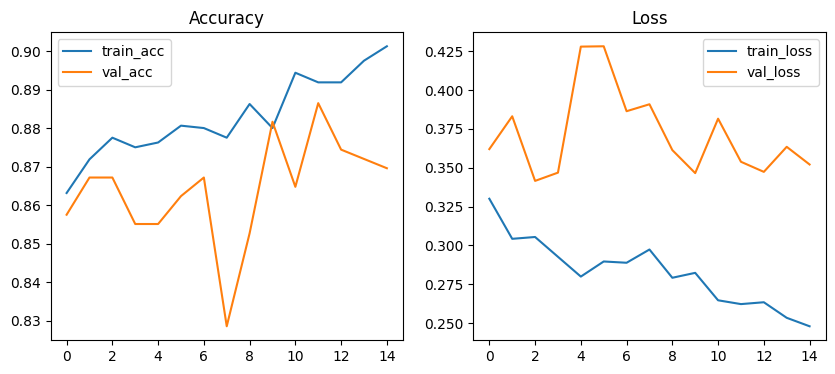

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')
plt.show()

In [17]:
val_loss, val_acc = model.evaluate(val_gen, verbose=1)
print("Validation loss:", val_loss, "Validation accuracy:", val_acc)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 428ms/step - accuracy: 0.8883 - loss: 0.2844
Validation loss: 0.3520841598510742 Validation accuracy: 0.8695651888847351


In [18]:
from google.colab import files
from tensorflow.keras.preprocessing import image

In [21]:
print("\nUpload a test image now (cat or rabbit):")
uploaded = files.upload()


Upload a test image now (cat or rabbit):


Saving Rabbit.jpg to Rabbit (2).jpg


In [ ]:

print("/nclass indices (train)", train_gen.class_indices)

/nclass indices (train) {'cat': 0, 'rabbit': 1}


In [22]:
if len(uploaded) > 0:
    img_name = list(uploaded.keys())[0]
    img_path = img_name
    img = image.load_img(img_path, target_size=(150,150))
    arr = image.img_to_array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)
    pred = model.predict(arr)[0][0]
    print("Prediction probability (0->cat, 1->dog):", pred)
    if pred > 0.5:
        print("🐰 Predicted: Rabbit (confidence {:.2f})".format(pred))
    else:
        print("🐱 Predicted: Cat (confidence {:.2f})".format(1-pred))
else:
    print("No image uploaded.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediction probability (0->cat, 1->dog): 0.9999498
🐰 Predicted: Rabbit (confidence 1.00)


In [23]:
from google.colab import files
from tensorflow.keras.preprocessing import image
print("/Upload test image now:(cat or rabbit)")
uploaded = files.upload()

/Upload test image now:(cat or rabbit)


Saving Rabbit.jpg to Rabbit (3).jpg


In [24]:
if len(uploaded) > 0:
    img_name = list(uploaded.keys())[0]
    img_path = img_name
    img = image.load_img(img_path, target_size=(150,150))
    arr = image.img_to_array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)
    pred = model.predict(arr)[0][0]
    print("Prediction probability (0->cat, 1->dog):", pred)
    if pred > 0.5:
        print("🐰 Predicted: Rabbit (confidence {:.2f})".format(pred))
    else:
        print("🐱 Predicted: Cat (confidence {:.2f})".format(1-pred))
else:
    print("No image uploaded.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction probability (0->cat, 1->dog): 0.9999498
🐰 Predicted: Rabbit (confidence 1.00)


In [ ]:
model.save('my_cnn_model.h5')